In [1]:
import numpy as np
import pandas as pd
import os
import fnmatch
from tqdm import tqdm
import matplotlib.pyplot as plt
#don't use scipy.chisquare at it has a threshold and below that the value is taken as nan.

This following notebook is to run theoretical models on spectrum code to find the best fit [SPECTRUM](https://www.appstate.edu/~grayro/spectrum/spectrum.html) by Richard O. Gray. From this one can determine the physical parameters like $T_{eff}$, Vsini and logg.

You can find the online documentation for the SPECTRUM v2.76 is [here](https://www.appstate.edu/~grayro/spectrum/spectrum276/spectrum276.html) 

# Run spectrum code

In [2]:
folder='/home/ganesh/Documents/spectrummodels/'
t=os.listdir(folder+'theo_models/')
# %cd /home/ganesh/Documents/spectrummodels/
#wavelength no more than 200A    
for i in range(len(t)):
    x=folder+'theo_models/'+t[i]
    y='luke.lst'
    z=folder+'models/A/'+'a_'+t[i]+'.dat'
    #print(x)
    #print(y)
    #print(z)
    #print(x:theo,y:lukelst,:z:new_theomodel,0.0:micro,startwave,endwave,steps)
    awaw=(x,'\n',y,'\n',z,'\n',"0.0\n4030.0,4200.0\n1.3")
    #print(' ')
    
    with open('/home/ganesh/Documents/spectrummodels/fdata2.rsp','w') as f:
        f.writelines(awaw)
    
    %cd /home/ganesh/Documents/spectrum277/
    os.system('spectrum < ../spectrummodels/fdata2.rsp')



# vsini

In [3]:
folder='/home/ganesh/Documents/spectrummodels/'
a=folder+'models/A/'
z=os.listdir(folder+'models/A/')
with open('/home/ganesh/Documents/spectrummodels/vsini.sh','w') as ff:
    for i in range(len(z)):
#10_300_10/5
        f=z[i].find('k')
        #set vsini range and step below.
        it_vsini=list(range(10,400,10))
        vsini='avsini'
        for j in range(len(it_vsini)):
            p=folder+'models/B_vsini/'+z[i][2:f]+'vs'+str(it_vsini[j])+'.dat'

        #print(vsini,a+z[i],p,it_vsini[j],'0.6 1.30\n')
            print(vsini,a+z[i],p,it_vsini[j],'0.6 1.30\n',file=ff)    
        #%cd /home/ganesh/Documents/spectrum277/
        #os.system('spectrum < ../spectrummodels/fdata2.rsp')
    

# macroturb

In [4]:
folder='/home/ganesh/Documents/spectrummodels/'
b=folder+'models/B_vsini/'
z=os.listdir(folder+'models/B_vsini/')

with open('/home/ganesh/Documents/spectrummodels/vm.sh','w') as ff:
    for i in range(len(z)):
        f=z[i].find('t',2,6)
        macturb='macturb'
        vm=list(range(1,15))
        for j in range(len(vm)):
            q = folder+'models/C_macturb/'+z[i][f:-4]+'m'+str(vm[j])+'.dat'
            print(macturb,b+z[i],q,f'1.3 {vm[j]}\n',file=ff )

        #print(vsini,a+z[i],p,it_vsini[j],'0.6 1.30\n')
        #f.writelines()



# $\chi^2$ comparison

In [5]:
from multiprocessing import Pool

folder='/home/ganesh/Documents/spectrummodels/'

it=os.listdir(folder+'models/C_macturb/')
#len(it)
chi=[]
ch=[]

p_vl=[]
p_val=[]

obs_spec=pd.read_fwf(folder+'hd4180_obs.txt',header=None)

def get_chi_stat(filename, obs_spec):
    the_spec=pd.read_fwf(filename, header=None)
    rms=((obs_spec - the_spec[1][:-8])**2)/the_spec[1][:-8]
    chi_stat=np.sum(rms)
    return chi_stat

def get_chi_stat_wrapper(filename):
    return get_chi_stat(filename, obs_spec[1][8:])

p = Pool(processes=3)
for x in tqdm(p.imap(get_chi_stat_wrapper, [folder+'models/C_macturb/'+it[i] for i in range(1000)]), total=1000):
    ch.append(x)

chi=np.array(ch)
mini=np.argmin(chi)
#minimum chi2 is to check the goodness of the fit
print(chi.min(),it[mini])




Rough work

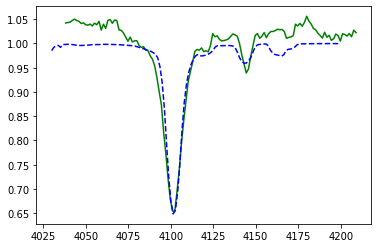

In [59]:
folder='/home/ganesh/Documents/spectrummodels/'

it=os.listdir(folder+'models/C_macturb/')
len(it)


obs_spec=pd.read_fwf(folder+'hd4180_obs.txt',header=None)

plt.plot(obs_spec[0]+8,obs_spec[1]-0.01,'g')
the_spec=pd.read_fwf(folder+'models/C_macturb/t16000g30vs390m14.dat',header=None)
#the_spec=pd.read_fwf(folder+'models/C_macturb/t16000g35vs390m14.dat',header=None)
plt.plot(the_spec[0],the_spec[1],'b--')
#obs_spec[0][8:],the_spec[0][:-8]

In [11]:
obs_spec=pd.read_fwf(folder+'hd4180_obs.txt',header=None)

the_spec=pd.read_fwf(folder+'models/C_macturb/t16000g30vs390m14.dat',header=None)


Res1= obs_spec[1] - the_spec[1]

Res_sq= Res1**2

Residue=sum(Res_sq)
Residue

1.1010382803096614

In [4]:
'''folder='/home/ganesh/Documents/spectrummodels/'
t=os.listdir(folder+'theo_models/')

for i in range(len(t)):
    x=folder+'theo_models/'+t[i]
    y='luke.lst'
    z=folder+'a_'+t[i]+'.dat'
    #print(x)
    #print(y)
    #print(z)
    #print("0.0\n4030.0,4200.0\n1.3")
    #print(' ')
    
    ####
    it_vsini=list(range(100,501,25))
    vsini='avsini'
    for j in range(len(it_vsini)):
        p=folder+'models/'+t[i]+'vs'+str(it_vsini[j])+'v01.dat'

        print(vsini,z,p,it_vsini[j],'0.6 1.30')
        
        macturb='macturb'
        vm=list(range(1,16))
        for k in range(len(vm)):
            q = folder+'models/A/'+t[i]+'vs'+str(it_vsini[j])+'vm'+str(vm[k])+'.dat'
            print(macturb,p,q,'1.3 1.0')
'''            

avsini /home/ganesh/Documents/spectrummodels/a_ap00t13000g30k0odfnew.mod.dat /home/ganesh/Documents/spectrummodels/models/ap00t13000g30k0odfnew.modvs100v01.dat 100 0.6 1.30
macturb /home/ganesh/Documents/spectrummodels/models/ap00t13000g30k0odfnew.modvs100v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t13000g30k0odfnew.modvs100vm1.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t13000g30k0odfnew.modvs100v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t13000g30k0odfnew.modvs100vm2.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t13000g30k0odfnew.modvs100v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t13000g30k0odfnew.modvs100vm3.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t13000g30k0odfnew.modvs100v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t13000g30k0odfnew.modvs100vm4.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t13000g30k0odfnew.modvs100v01.dat 

macturb /home/ganesh/Documents/spectrummodels/models/ap00t13000g30k0odfnew.modvs325v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t13000g30k0odfnew.modvs325vm11.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t13000g30k0odfnew.modvs325v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t13000g30k0odfnew.modvs325vm12.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t13000g30k0odfnew.modvs325v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t13000g30k0odfnew.modvs325vm13.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t13000g30k0odfnew.modvs325v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t13000g30k0odfnew.modvs325vm14.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t13000g30k0odfnew.modvs325v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t13000g30k0odfnew.modvs325vm15.dat 1.3 1.0
avsini /home/ganesh/Documents/spectrummodels/a_ap00t13000g30k0odfnew.mod.da

macturb /home/ganesh/Documents/spectrummodels/models/ap00t33000g45k0odfnew.modvs150v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t33000g45k0odfnew.modvs150vm8.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t33000g45k0odfnew.modvs150v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t33000g45k0odfnew.modvs150vm9.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t33000g45k0odfnew.modvs150v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t33000g45k0odfnew.modvs150vm10.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t33000g45k0odfnew.modvs150v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t33000g45k0odfnew.modvs150vm11.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t33000g45k0odfnew.modvs150v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t33000g45k0odfnew.modvs150vm12.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t33000g45k0odfnew.mo

macturb /home/ganesh/Documents/spectrummodels/models/ap00t33000g45k0odfnew.modvs425v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t33000g45k0odfnew.modvs425vm15.dat 1.3 1.0
avsini /home/ganesh/Documents/spectrummodels/a_ap00t33000g45k0odfnew.mod.dat /home/ganesh/Documents/spectrummodels/models/ap00t33000g45k0odfnew.modvs450v01.dat 450 0.6 1.30
macturb /home/ganesh/Documents/spectrummodels/models/ap00t33000g45k0odfnew.modvs450v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t33000g45k0odfnew.modvs450vm1.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t33000g45k0odfnew.modvs450v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t33000g45k0odfnew.modvs450vm2.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t33000g45k0odfnew.modvs450v01.dat /home/ganesh/Documents/spectrummodels/models/A/ap00t33000g45k0odfnew.modvs450vm3.dat 1.3 1.0
macturb /home/ganesh/Documents/spectrummodels/models/ap00t33000g45k0odfnew.modvs450v01.dat

In [ ]:
#%cd 
'''
awaw=('/home/ganesh/Documents/spectrummodels/theo_models/ap00t13000g30k0odfnew.mod' , 'luke.lst', '/home/ganesh/Documents/spectrummodels/a.dat','0.0', '4030.0,4200.0'
, '1.3')

#print(random_string)

#awaw='/home/ganesh/Documents/spectrummodels/fdata.rsp'
#%cd /home/ganesh/Documents/spectrum277/
random_string = 'spectrum < {}'.format(str(awaw))
print(random_string)
# os.system(random_string)

awaw=[('/home/ganesh/Documents/spectrummodels/theo_models/ap00t13000g30k0odfnew.mod\n' , 'luke.lst\n', 
      '/home/ganesh/Documents/spectrummodels/a.dat\n','0.0\n', '4030.0,4200.0\n', '1.3'),
      ('/home/ganesh/Documents/spectrummodels/theo_models/ap00t13000g30k0odfnew.mod\n' , 'luke.lst\n', 
      '/home/ganesh/Documents/spectrummodels/a.dat\n','0.0\n', '4032220.0,4200.0\n', '1.31231')]

%cd /home/ganesh/Documents/spectrummodels/
for i in range(2):
    f = open('fdata2.rsp','w')
    f.writelines(awaw[i])
    f.close()
    print(i)
    #os.system(r'spectrum < ../spectrummodels/fdata2.rsp')
    
'''

#import threading
#threading.activeCount()

'''f=z[0].find('k')
z[0][:f]
it_vsinihttps://mail.google.com/mail/u/0/#inbox
it=os.listdir(folder+'models/B_vsini/')
len(it)




folder='/home/ganesh/Documents/spectrummodels/'

it=os.listdir(folder+'models/C_macturb/')
#len(it)
chi=[]
ch=[]

p_vl=[]
p_val=[]
obs_spec=pd.read_fwf(folder+'hd4180_obs.txt',header=None)
for i in tqdm (range(10000),desc="Loading..."):
    the_spec=pd.read_fwf(folder+'models/C_macturb/'+it[i],header=None)
    #print(the_spec[1])
    #chi_stat,pval=(sps.chisquare(obs_spec[1],the_spec[1]))
    rms=((obs_spec[1]-the_spec[1])**2)/the_spec[1]
    chi_stat=np.sum(rms)
    ch.append(chi_stat)
    #len(obs_spec[1])
#print(len(the_spec[1]))
#print(len(obs_spec[1]))
#p_vl.append(pval)
chi=np.array(ch)
#p_val=np.array(p_vl)

mini=np.argmin(chi)

print(chi.min(),it[mini])
'''


In [ ]:
'''folder='/home/ganesh/Documents/spectrummodels/'

it=os.listdir(folder+'models/C_macturb/')
#len(it)
chi=[]
ch=[]

p_vl=[]
p_val=[]
obs_spec=pd.read_fwf(folder+'hd4180_obs.txt',header=None)
for i in tqdm (range(100),desc="Loading..."):
    the_spec=pd.read_fwf(folder+'models/C_macturb/'+it[i],header=None)
    #print(the_spec[1])
    chi_stat,pval=(sps.chisquare(f_obs=obs_spec[1], f_exp=the_spec[1]))
    #chi_stat,pval=(sps.chisquare(obs_spec[1],obs_spec[1]))
    ch.append(chi_stat)
    p_vl.append(pval)
chi=np.array(ch)
p_val=np.array(p_vl)

mini=np.argmin(chi)

print(chi.min(),p_val[mini],it[mini])

#plt.plot(obs_spec[0],obs_spec[1],'r')
#the_spec=pd.read_fwf(folder+'models/C_macturb/'+it[mini],header=None)
#plt.plot(the_spec[0],the_spec[1])'''